In [6]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.4 MB/s eta 0:00:00 MB/s eta 0:00:0101

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
#Can we predict if a video will trend based on its metadata?

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
df = pd.read_csv('../Data/clean/cleaned_youtube_trending.csv')

# Drop rows with missing values in important fields
df = df.dropna(subset=['title', 'views', 'likes', 'category_id'])

#filtering out very low viewed vids
df = df[df['views'] > 10000]

#top 10% views = 1 , rest = 0
threshold = df['views'].quantile(0.90)
df['is_trending'] = (df['views'] >= threshold).astype(int)


In [10]:
# Title length
df['title_len'] = df['title'].apply(len)

# Number of tags
df['num_tags'] = df['tags'].apply(lambda x: len(str(x).split('|')) if pd.notnull(x) else 0)

# Encode category
cat_encoder = LabelEncoder()
df['category_encoded'] = cat_encoder.fit_transform(df['category_id'])


In [11]:
features = ['title_len', 'num_tags', 'category_encoded', 'likes']
X = df[features]
y = df['is_trending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25818
           1       0.95      0.89      0.92      2865

    accuracy                           0.98     28683
   macro avg       0.97      0.94      0.95     28683
weighted avg       0.98      0.98      0.98     28683



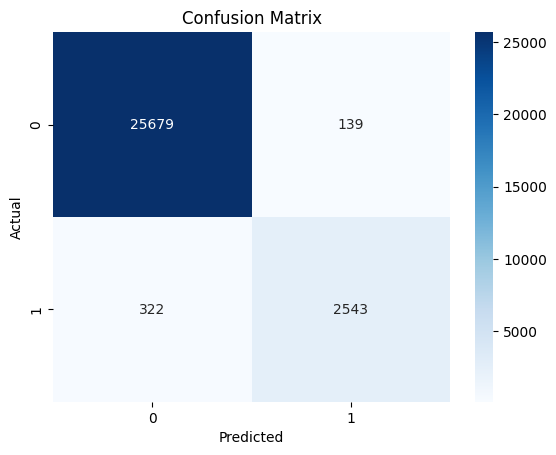

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


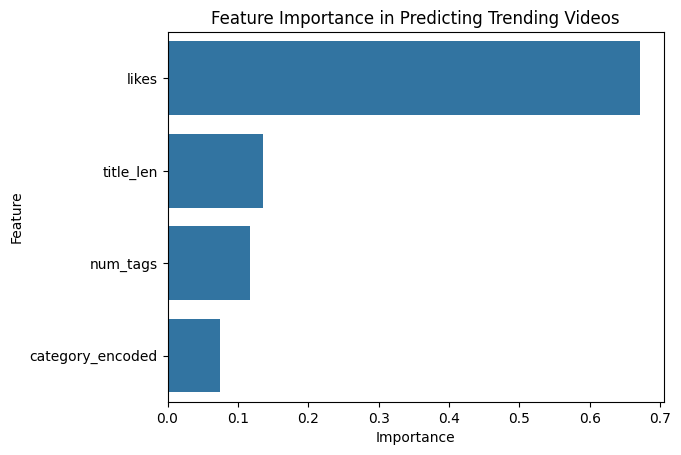

In [14]:
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance in Predicting Trending Videos')
plt.show()
